In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

%matplotlib inline

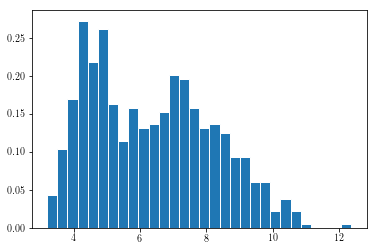

In [2]:
# Generating data
rnseed = 54243
np.random.seed(seed=rnseed)

data = np.concatenate([np.random.normal(4.5,0.5,200),np.random.normal(7.3,1.5,400)])

plt.figure(figsize=(6,4))
plt.hist(data, bins=30, density=True, edgecolor='w');

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, w]
Sampling 4 chains: 100%|██████████| 24000/24000 [00:10<00:00, 2323.44draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/home/arash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


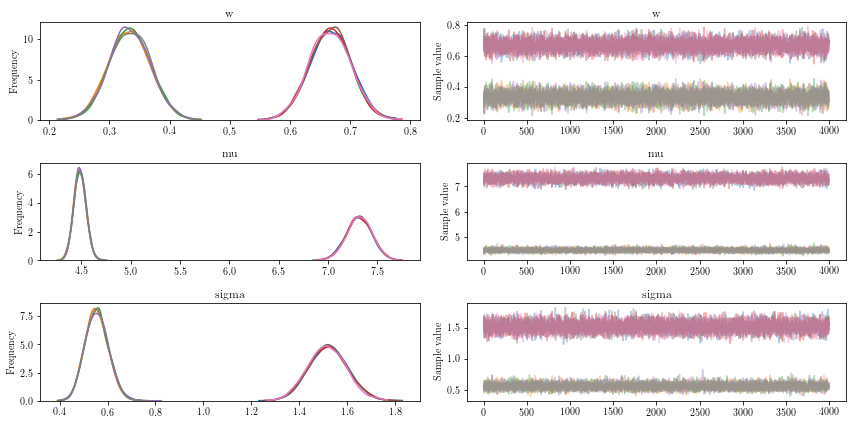

In [3]:
with pm.Model() as model:
    w = pm.Dirichlet('w', np.array([1.0,1.0]))

    mu = pm.Normal('mu', 0., 10., shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=10, shape=2)

    x_obs = pm.NormalMixture('x_obs', w, mu, sd=sigma, observed=data)

    trace = pm.sample(5000, tune=1000, random_seed=rnseed)[1000:]
    
pm.traceplot(trace, varnames=['w', 'mu', 'sigma']);

In [4]:
with model:
    ppc_trace = pm.sample_ppc(trace, 5000, random_seed=546)

100%|██████████| 5000/5000 [00:04<00:00, 1072.41it/s]


/home/arash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


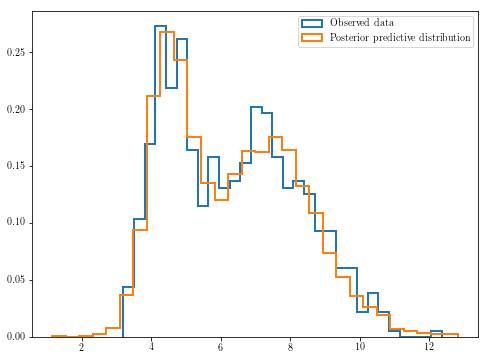

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(data, bins=30, normed=True,
        histtype='step', lw=2,
        label='Observed data');
ax.hist(ppc_trace['x_obs'].transpose()[0], bins=30, normed=True,
        histtype='step', lw=2,
        label='Posterior predictive distribution');

ax.legend(loc=1);